# Bank Customer Churn Prediction 
____

###### BY Asmaa Gaber

## 1)Importing libraries 

In [1]:

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 2) data reshaping 

In [3]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data['Geography'].nunique()

3

In [6]:
data_encoded = pd.get_dummies(data,columns=['Geography'],drop_first=False)

data_encoded

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [7]:
Dict={'Female':1,'Male':0}
data_encoded['Gender']=data_encoded['Gender'].map(Dict)

In [8]:
data_encoded

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,1,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [9]:
columns_to_convert = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


<Axes: >

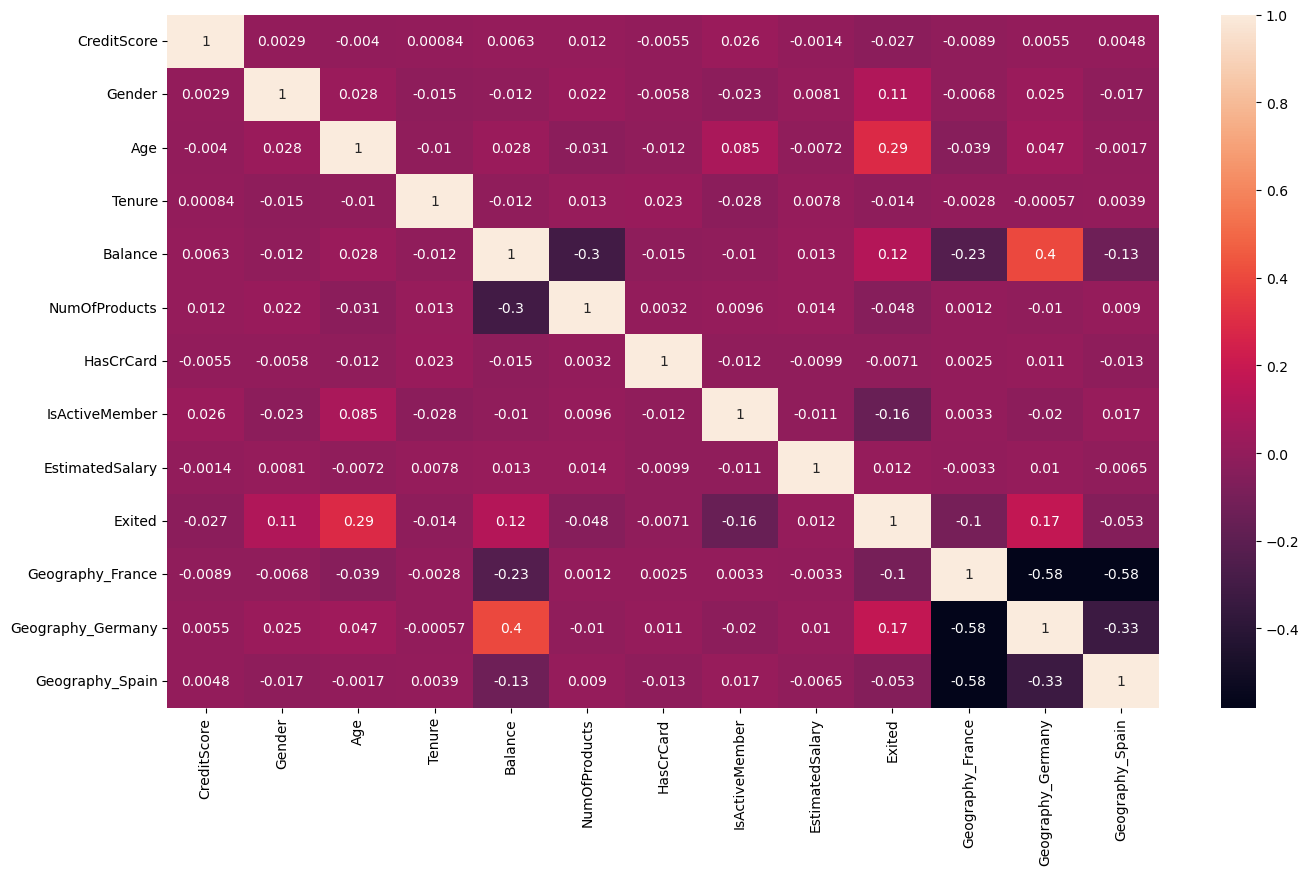

In [10]:
corr = data_encoded.corr()

plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True)

## Feature Extraction 
_____

In [11]:
data_encoded['Balance_To_Salary']=data_encoded['Balance']/data_encoded['EstimatedSalary']
data_encoded

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Balance_To_Salary
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,0.000000
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0.744677
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1.401375
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,0.000000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0,0.000000
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0.564108
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0,0.000000
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0.808230


In [12]:
data_encoded['Turner_Per_Age']=data_encoded['Tenure']/data_encoded['Age']

In [13]:
average=data.groupby('Geography')['NumOfProducts'].mean().reset_index()

In [14]:
data_encoded['Geography']=data['Geography']
data_encoded=data_encoded.merge(average,on=['Geography'],suffixes=('','_average'))

In [15]:
data_encoded

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Balance_To_Salary,Turner_Per_Age,Geography,NumOfProducts_average
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,0.000000,0.047619,France,1.530913
1,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1.401375,0.190476,France,1.530913
2,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,0.000000,0.025641,France,1.530913
3,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0,0.000000,0.140000,France,1.530913
4,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0,1.895518,0.090909,France,1.530913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,655,1,46,7,137145.12,1,1,0,115146.40,1,0,1,0,1.191050,0.152174,Germany,1.519729
9996,602,0,35,7,90602.42,2,1,1,51695.41,0,0,1,0,1.752620,0.200000,Germany,1.519729
9997,673,0,47,1,183579.54,2,0,1,34047.54,0,0,1,0,5.391859,0.021277,Germany,1.519729
9998,714,0,33,3,35016.60,1,1,0,53667.08,0,0,1,0,0.652478,0.090909,Germany,1.519729


## check for Nulls 

In [16]:
null_values = data.isnull().sum()
print( null_values)


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## check imbalaced data

In [17]:
print(data['Exited'].value_counts(normalize=True))

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [18]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            10000 non-null  int64  
 1   Gender                 10000 non-null  int64  
 2   Age                    10000 non-null  int64  
 3   Tenure                 10000 non-null  int64  
 4   Balance                10000 non-null  float64
 5   NumOfProducts          10000 non-null  int64  
 6   HasCrCard              10000 non-null  int64  
 7   IsActiveMember         10000 non-null  int64  
 8   EstimatedSalary        10000 non-null  float64
 9   Exited                 10000 non-null  int64  
 10  Geography_France       10000 non-null  int32  
 11  Geography_Germany      10000 non-null  int32  
 12  Geography_Spain        10000 non-null  int32  
 13  Balance_To_Salary      10000 non-null  float64
 14  Turner_Per_Age         10000 non-null  float64
 15  Geo

In [19]:
data_encoded.drop(columns = ['Geography'],inplace=True)

### Outliers
____

In [20]:

data_encoded['Age'].describe()



count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: >

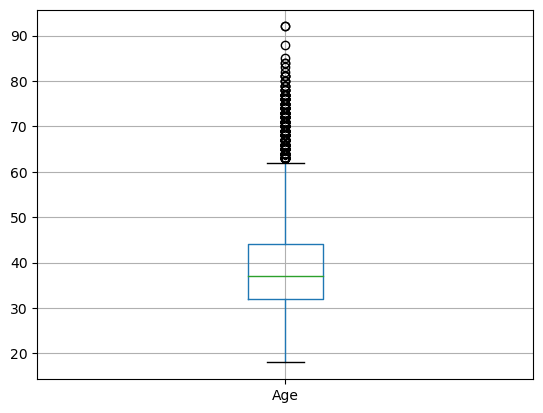

In [21]:
data.boxplot('Age')

In [22]:
data_encoded[data_encoded['Age']>62].shape

(359, 16)

In [23]:
outliers=data_encoded[data_encoded['Age']>=62]
mydata=data_encoded[data_encoded['Age']<62]
Accepted_outliers=outliers.sample(frac=0.2)
FinalData=pd.concat([Accepted_outliers,mydata],axis=0)
FinalData.shape

(9671, 16)

In [24]:
FinalData['CreditScore'].describe()



count    9671.000000
mean      650.243098
std        96.665736
min       350.000000
25%       583.500000
50%       652.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

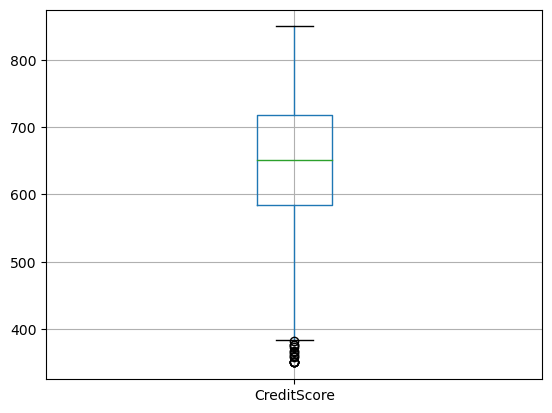

In [25]:
data.boxplot('CreditScore')
plt.show()  

In [26]:
FinalData['CreditScore'].shape

(9671,)

In [27]:

cols=['EstimatedSalary','Tenure','Age','CreditScore','NumOfProducts_average','Balance','NumOfProducts']

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


for col in cols:
    lower_bound, upper_bound = find_outliers(FinalData[col])
    
    outliers = FinalData[(FinalData[col] < lower_bound) | (FinalData[col] > upper_bound)]
    
    
    mydata = FinalData[(FinalData[col] >= lower_bound) & (FinalData[col] <= upper_bound)]
   
    Accepted_outliers = outliers.sample(frac=0.2, random_state=42)
    
    FinalData = pd.concat([Accepted_outliers, mydata], axis=0).reset_index(drop=True)

    print(f"Column: {col}")
    print(f"Outliers shape: {outliers.shape}")
    print(f"Non-outliers shape: {mydata.shape}")
    print(f"Accepted outliers shape: {Accepted_outliers.shape}")
    print(f"Final data shape after concatenation: {FinalData.shape}")
    print("\n")


Column: EstimatedSalary
Outliers shape: (0, 16)
Non-outliers shape: (9671, 16)
Accepted outliers shape: (0, 16)
Final data shape after concatenation: (9671, 16)


Column: Tenure
Outliers shape: (0, 16)
Non-outliers shape: (9671, 16)
Accepted outliers shape: (0, 16)
Final data shape after concatenation: (9671, 16)


Column: Age
Outliers shape: (197, 16)
Non-outliers shape: (9474, 16)
Accepted outliers shape: (39, 16)
Final data shape after concatenation: (9513, 16)


Column: CreditScore
Outliers shape: (14, 16)
Non-outliers shape: (9499, 16)
Accepted outliers shape: (3, 16)
Final data shape after concatenation: (9502, 16)


Column: NumOfProducts_average
Outliers shape: (0, 16)
Non-outliers shape: (9502, 16)
Accepted outliers shape: (0, 16)
Final data shape after concatenation: (9502, 16)


Column: Balance
Outliers shape: (0, 16)
Non-outliers shape: (9502, 16)
Accepted outliers shape: (0, 16)
Final data shape after concatenation: (9502, 16)


Column: NumOfProducts
Outliers shape: (55, 16

In [28]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9458 entries, 0 to 9457
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            9458 non-null   int64  
 1   Gender                 9458 non-null   int64  
 2   Age                    9458 non-null   int64  
 3   Tenure                 9458 non-null   int64  
 4   Balance                9458 non-null   float64
 5   NumOfProducts          9458 non-null   int64  
 6   HasCrCard              9458 non-null   int64  
 7   IsActiveMember         9458 non-null   int64  
 8   EstimatedSalary        9458 non-null   float64
 9   Exited                 9458 non-null   int64  
 10  Geography_France       9458 non-null   int32  
 11  Geography_Germany      9458 non-null   int32  
 12  Geography_Spain        9458 non-null   int32  
 13  Balance_To_Salary      9458 non-null   float64
 14  Turner_Per_Age         9458 non-null   float64
 15  NumO

In [29]:


x=FinalData.drop('Exited',axis=1)
y=FinalData['Exited']

smote=SMOTE(random_state=42)
xr,yr=smote.fit_resample(x,y)

X_train,X_test,y_train,y_test=train_test_split(xr,yr,test_size=0.2, random_state=42)


In [30]:

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=400,max_depth=40,random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.8853482260183968
RandomForestClassifierModel features importances are :  [0.07285057 0.01257143 0.1778926  0.04094653 0.08134054 0.09775234
 0.01466777 0.08478647 0.07838646 0.04939805 0.02027963 0.03444439
 0.06610217 0.08301132 0.0855697 ]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1 0 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.2775 0.7225]
 [0.55   0.45  ]
 [0.0075 0.9925]
 [0.995  0.005 ]
 [0.015  0.985 ]
 [0.01   0.99  ]
 [0.0625 0.9375]
 [0.2475 0.7525]
 [0.925  0.075 ]
 [0.03   0.97  ]]


In [31]:


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1387  153]
 [ 196 1308]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1540
           1       0.90      0.87      0.88      1504

    accuracy                           0.89      3044
   macro avg       0.89      0.89      0.89      3044
weighted avg       0.89      0.89      0.89      3044

